In [62]:
import os
import glob
from PIL import Image
import pandas as pd
import numpy as np
import tensorflow as tf

In [63]:
from google.colab import files
uploaded = files.upload()

Saving cifar-100-python.tar.gz to cifar-100-python.tar (1).gz


In [64]:
!tar -zxvf cifar-100-python.tar.gz

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


In [65]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [66]:
meta = unpickle('cifar-100-python/meta')
train = unpickle('cifar-100-python/train')
test = unpickle('cifar-100-python/test')

In [67]:
meta_keys = list(meta.keys())
meta_keys

[b'fine_label_names', b'coarse_label_names']

In [68]:
Classes = pd.DataFrame(meta[b'fine_label_names'],columns = ['Classes'])

In [69]:
len(Classes)

100

In [70]:
Classes

,Classes
0,b'apple'
1,b'aquarium_fish'
2,b'baby'
3,b'bear'
4,b'beaver'
...,...
95,b'whale'
96,b'willow_tree'
97,b'wolf'
98,b'woman'


In [71]:
training_keys = list(train.keys())
training_keys

[b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data']

In [72]:
test_keys = list(test.keys())
test_keys

[b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data']

In [73]:
train_images = train[b'data']
test_images = test[b'data']
train_images.shape


(50000, 3072)

In [74]:
test_images.shape

(10000, 3072)

In [75]:
img_num = np.random.randint(0,1000)
print(img_num)
Classes.iloc[train[b'fine_labels'][0]]

75


Classes    b'cattle'
Name: 19, dtype: object

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
train_images = train_images.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
train_images = tf.cast(train_images, tf.float32)
train_images.shape
train_images = train_images/255
train_images[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7647059 , 0.8039216 , 0.75686276],
        [0.83137256, 0.8784314 , 0.8       ],
        [0.7137255 , 0.7607843 , 0.654902  ]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.6666667 , 0.6901961 , 0.5882353 ],
        [0.6313726 , 0.65882355, 0.50980395],
        [0.57254905, 0.6039216 , 0.44313726]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7411765 , 0.78039217, 0.6627451 ],
        [0.6509804 , 0.69803923, 0.50980395],
        [0.4745098 , 0.52156866, 0.34117648]],

       ...,

       [[0.5803922 , 0.7254902 , 0.30980393],
        [0.5568

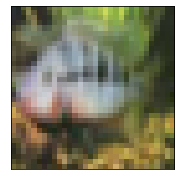

In [77]:
plt.figure(figsize=(6,3))
plt.xticks([])
plt.yticks([])
plt.imshow(train_images[4])

In [78]:
print(train[b'fine_labels'][40000])

76


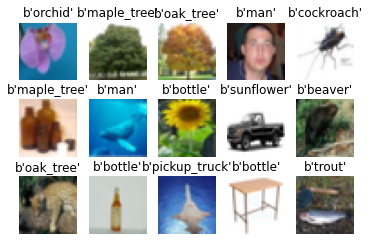

In [79]:
num_images_row = 3
num_images_column = 5
img_nums = np.random.randint(0,len(train_images),num_images_row*num_images_column)

f, axarr = plt.subplots(num_images_row,num_images_column)

for i in range(0,num_images_row):
    for j in range(0,num_images_column):
        axarr[i,j].imshow(train_images[img_nums[(i*num_images_column)+j]])
        axarr[i,j].set_title(str(Classes.iloc[train[b'fine_labels'][img_nums[(i+1)*(j+1)-1]]]).split()[1])
        axarr[i,j].axis('off')

In [80]:
test_images = test_images.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
test_images = tf.cast(test_images, tf.float32)
test_images.shape
test_images = test_images/255
test_images[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[0.78039217, 0.84313726, 0.9764706 ],
        [0.76862746, 0.827451  , 0.95686275],
        [0.7647059 , 0.8235294 , 0.9529412 ],
        ...,
        [0.84705883, 0.90588236, 0.98039216],
        [0.8509804 , 0.90588236, 0.98039216],
        [0.8784314 , 0.91764706, 0.9882353 ]],

       [[0.77254903, 0.8235294 , 0.9372549 ],
        [0.7647059 , 0.8156863 , 0.93333334],
        [0.7647059 , 0.8235294 , 0.9411765 ],
        ...,
        [0.90588236, 0.9529412 , 0.98039216],
        [0.9137255 , 0.9529412 , 0.98039216],
        [0.94509804, 0.9607843 , 0.99215686]],

       [[0.87058824, 0.8862745 , 0.9647059 ],
        [0.8352941 , 0.8627451 , 0.9490196 ],
        [0.81960785, 0.85882354, 0.9529412 ],
        ...,
        [0.9529412 , 0.98039216, 0.9843137 ],
        [0.95686275, 0.9764706 , 0.9843137 ],
        [0.98039216, 0.98039216, 0.99215686]],

       ...,

       [[0.28235295, 0.28627452, 0.3882353 ],
        [0.2784

In [81]:
# Now we build the labels and images as lists
train_labels = train[b'fine_labels']
test_labels = test[b'fine_labels']

In [ ]:
test_labels[0:100]

In [82]:
len(train_labels), len(test_labels)

(50000, 10000)

In [83]:
num_ways = [5, 5, 12, 12, 15]
num_shots = [5, 1, 5, 1, 3]
learning_rate = 0.001
img_width = 32
img_height = 32
channels = 3
learning_rate = 0.001
num_classes = 100

In [105]:
def get_next_batch(dataset, labels, num_way, num_shot, num_query, no_of_classes):
  episodic_classes = np.random.permutation(no_of_classes)[:num_way]
  support = np.zeros([num_way, num_shot, img_width , img_height, channels], dtype=np.float32)
  query = np.zeros([num_way, num_query, img_width , img_height, channels], dtype=np.float32)

  for index, class_ in enumerate(episodic_classes):
    indices = find_indices(labels, class_)
    #check that the size is greater than num_shot + num_query
    selected = np.random.permutation(indices)[:num_shot + num_query]
    for support_index in range(num_shot):
       support[index][support_index] = dataset[selected[support_index]] 
    for query_index in range(num_query):
       query[index][query_index] = dataset[selected[num_shot + query_index]]  
    
  return support, query

def find_indices(list_to_check, item_to_find):
  indices = []
  for idx, value in enumerate(list_to_check):
    if value == item_to_find:
      indices.append(idx)
  return indices



In [ ]:
support, query = get_next_batch(test_images, test_labels, 20, 7, 3, 100)

In [86]:
support.shape

(20, 7, 32, 32, 3)

In [87]:
query.shape

(20, 3, 32, 32, 3)

In [88]:
def show_image(dataset, index, image_number):
  plt.figure(figsize=(2,3))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(dataset[index][image_number])


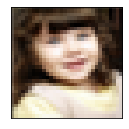

In [89]:
show_image(support, 5, 4)

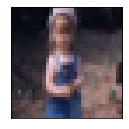

In [90]:
show_image(query, 5, 1)

In [91]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [92]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, Dropout, GlobalMaxPooling2D
from tensorflow.keras import Model

class Prototypical(Model):
    """
    Implemenation of Prototypical Network.
    """
    def __init__(self, n_support, n_query, w, h, c):
        """
        Args:
            n_support (int): number of support examples.
            n_query (int): number of query examples.
            w (int): image width .
            h (int): image height.
            c (int): number of channels.
        """
        super(Prototypical, self).__init__()
        self.w, self.h, self.c = w, h, c

        # Encoder as ResNet like CNN with 4 blocks
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)),

            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)),

            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)),

            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)), Flatten()]
        )

    def call(self, support, query):
        n_class = support.shape[0]
        n_support = support.shape[1]
        n_query = query.shape[1]
        y = np.tile(np.arange(n_class)[:, np.newaxis], (1, n_query))
        y_onehot = tf.cast(tf.one_hot(y, n_class), tf.float32)

        # correct indices of support samples (just natural order)
        target_inds = tf.reshape(tf.range(n_class), [n_class, 1])
        target_inds = tf.tile(target_inds, [1, n_query])

        # merge support and query to forward through encoder
        cat = tf.concat([
            tf.reshape(support, [n_class * n_support,
                                 self.w, self.h, self.c]),
            tf.reshape(query, [n_class * n_query,
                               self.w, self.h, self.c])], axis=0)
        z = self.encoder(cat)

        # Divide embedding into support and query
        z_prototypes = tf.reshape(z[:n_class * n_support],
                                  [n_class, n_support, z.shape[-1]])
        # Prototypes are means of n_support examples
        z_prototypes = tf.math.reduce_mean(z_prototypes, axis=1)
        z_query = z[n_class * n_support:]

        # Calculate distances between query and prototypes
        dists = euclidean_distance(z_query, z_prototypes)

        # log softmax of calculated distances
        log_p_y = tf.nn.log_softmax(-dists, axis=-1)
        log_p_y = tf.reshape(log_p_y, [n_class, n_query, -1])
        
        loss = -tf.reduce_mean(tf.reshape(tf.reduce_sum(tf.multiply(y_onehot, log_p_y), axis=-1), [-1]))
        eq = tf.cast(tf.equal(
            tf.cast(tf.argmax(log_p_y, axis=-1), tf.int32), 
            tf.cast(y, tf.int32)), tf.float32)
        acc = tf.reduce_mean(eq)
        return loss, acc

    def save(self, model_path):
        """
        Save encoder to the file.

        Args:
            model_path (str): path to the .h5 file.

        Returns: None

        """
        self.encoder.save(model_path)

    def load(self, model_path):
        """
        Load encoder from the file.

        Args:
            model_path (str): path to the .h5 file.

        Returns: None

        """
        self.encoder(tf.zeros([1, self.w, self.h, self.c]))
        self.encoder.load_weights(model_path)

In [93]:
def euclidean_distance(a, b):

    N, D = tf.shape(a)[0], tf.shape(a)[1]
    M = tf.shape(b)[0]
    a = tf.tile(tf.expand_dims(a, axis=1), (1, M, 1))
    b = tf.tile(tf.expand_dims(b, axis=0), (N, 1, 1))
    return tf.reduce_mean(tf.square(a - b), axis=2)

In [ ]:
#number of classes
num_way = num_ways[0] 

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)
optimizer = tf.keras.optimizers.Adam(learning_rate)

num_epochs = 80
num_episodes = 100
save_path = "./results/models/cifar100_train0.h5"

least_loss = {'least_loss': 100.00}

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

val_losses = []

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
      
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  1.4934821
Epoch 1, Loss: 1.4934821128845215, Accuracy: 36.800010681152344


Saving new best model with loss:  1.4072351
Epoch 2, Loss: 1.4072351455688477, Accuracy: 41.28000259399414


Saving new best model with loss:  1.3570087
Epoch 3, Loss: 1.357008695602417, Accuracy: 44.96000671386719


Saving new best model with loss:  1.3090608
Epoch 4, Loss: 1.30906081199646, Accuracy: 47.92000198364258
Epoch 5, Loss: 1.3221560716629028, Accuracy: 45.6400032043457
Epoch 6, Loss: 1.3176957368850708, Accuracy: 45.440006256103516
Epoch 7, Loss: 1.3673193454742432, Accuracy: 41.84000778198242
Epoch 8, Loss: 1.3413975238800049, Accuracy: 45.440006256103516
Epoch 9, Loss: 1.342879295349121, Accuracy: 45.2400016784668


Saving new best model with loss:  1.2443255
Epoch 10, Loss: 1.2443255186080933, Accuracy: 50.079994201660156
Epoch 11, Loss: 1.2929754257202148, Accuracy: 47.360008239746094


Saving new best model with loss:  1.2422239
Epoch 12, Loss: 1.242223858833313, Accuracy: 50.43999099731445
Epoch 13, Loss: 1.248316764831543, Accuracy: 50.55998992919922


Saving new best model with loss:  1.2309645
Epoch 14, Loss: 1.2309645414352417, Accuracy: 50.2800178527832


Saving new best model with loss:  1.229555
Epoch 15, Loss: 1.2295550107955933, Accuracy: 49.96001052856445


Saving new best model with loss:  1.2087263
Epoch 16, Loss: 1.2087262868881226, Accuracy: 51.28000259399414


Saving new best model with loss:  1.183537
Epoch 17, Loss: 1.1835370063781738, Accuracy: 53.08000564575195
Epoch 18, Loss: 1.2090681791305542, Accuracy: 51.68000030517578
Epoch 19, Loss: 1.1958621740341187, Accuracy: 51.59999084472656


Saving new best model with loss:  1.1293796
Epoch 20, Loss: 1.1293796300888062, Accuracy: 54.68000030517578
Epoch 21, Loss: 1.1485600471496582, Accuracy: 54.27999496459961
Epoch 22, Loss: 1.1607081890106201, Accuracy: 53.92000198364258


Saving new best model with loss:  1.10498
Epoch 23, Loss: 1.1049799919128418, Accuracy: 56.48000717163086
Epoch 24, Loss: 1.1314524412155151, Accuracy: 54.119991302490234


Saving new best model with loss:  1.0883794
Epoch 25, Loss: 1.0883793830871582, Accuracy: 56.4799919128418
Epoch 26, Loss: 1.1082953214645386, Accuracy: 55.55999755859375
Epoch 27, Loss: 1.1123815774917603, Accuracy: 56.12000274658203


Saving new best model with loss:  1.0742767
Epoch 28, Loss: 1.0742766857147217, Accuracy: 57.040000915527344
Epoch 29, Loss: 1.1261990070343018, Accuracy: 55.40000915527344
Epoch 30, Loss: 1.1085213422775269, Accuracy: 54.71999740600586
Epoch 31, Loss: 1.0929409265518188, Accuracy: 57.720001220703125
Epoch 32, Loss: 1.1052669286727905, Accuracy: 56.079994201660156
Epoch 33, Loss: 1.079243540763855, Accuracy: 58.439998626708984


Saving new best model with loss:  1.0725011
Epoch 34, Loss: 1.0725010633468628, Accuracy: 57.599998474121094


Saving new best model with loss:  1.0540266
Epoch 35, Loss: 1.0540266036987305, Accuracy: 56.719993591308594
Epoch 36, Loss: 1.0867691040039062, Accuracy: 55.19999313354492
Epoch 37, Loss: 1.0637192726135254, Accuracy: 57.15998840332031
Epoch 38, Loss: 1.0801911354064941, Accuracy: 55.63999557495117


Saving new best model with loss:  1.0295553
Epoch 39, Loss: 1.029555320739746, Accuracy: 58.839996337890625
Epoch 40, Loss: 1.0566368103027344, Accuracy: 57.44000244140625
Epoch 41, Loss: 1.0636284351348877, Accuracy: 56.63999938964844


Saving new best model with loss:  1.0017923
Epoch 42, Loss: 1.001792311668396, Accuracy: 60.43999099731445
Epoch 43, Loss: 1.0474038124084473, Accuracy: 57.36000442504883
Epoch 44, Loss: 1.0183831453323364, Accuracy: 59.03999710083008
Epoch 45, Loss: 1.0170657634735107, Accuracy: 58.839988708496094


Saving new best model with loss:  0.98512477
Epoch 46, Loss: 0.9851247668266296, Accuracy: 61.91998291015625
Epoch 47, Loss: 0.9924702644348145, Accuracy: 60.679996490478516
Epoch 48, Loss: 1.0123764276504517, Accuracy: 60.839988708496094
Epoch 49, Loss: 0.9959986209869385, Accuracy: 60.67998504638672
Epoch 50, Loss: 1.0328550338745117, Accuracy: 58.67999267578125
Epoch 51, Loss: 0.9951831102371216, Accuracy: 60.71998596191406
Epoch 52, Loss: 0.9911749958992004, Accuracy: 61.679996490478516
Epoch 53, Loss: 1.000388503074646, Accuracy: 60.5999870300293


Saving new best model with loss:  0.9675375
Epoch 54, Loss: 0.967537522315979, Accuracy: 63.159976959228516
Epoch 55, Loss: 1.0081409215927124, Accuracy: 61.559993743896484


Saving new best model with loss:  0.9406081
Epoch 56, Loss: 0.9406080842018127, Accuracy: 63.19997787475586
Epoch 57, Loss: 0.9747971296310425, Accuracy: 61.19998550415039
Epoch 58, Loss: 0.9728426337242126, Accuracy: 61.59996795654297
Epoch 59, Loss: 0.9651728272438049, Accuracy: 62.80000305175781


Saving new best model with loss:  0.92335784
Epoch 60, Loss: 0.9233578443527222, Accuracy: 62.80000305175781
Epoch 61, Loss: 1.0011993646621704, Accuracy: 60.7599983215332
Epoch 62, Loss: 0.9467480182647705, Accuracy: 62.59999084472656
Epoch 63, Loss: 0.9481459856033325, Accuracy: 62.15998077392578


Saving new best model with loss:  0.9149807
Epoch 64, Loss: 0.9149807095527649, Accuracy: 64.7199935913086
Epoch 65, Loss: 0.9258831143379211, Accuracy: 63.99998474121094
Epoch 66, Loss: 0.9685413241386414, Accuracy: 62.52000427246094
Epoch 67, Loss: 0.9771031141281128, Accuracy: 61.03998947143555
Epoch 68, Loss: 0.9532865881919861, Accuracy: 62.280006408691406
Epoch 69, Loss: 0.9326861500740051, Accuracy: 63.60000228881836


Saving new best model with loss:  0.91174394
Epoch 70, Loss: 0.9117439389228821, Accuracy: 62.920005798339844
Epoch 71, Loss: 0.9261624217033386, Accuracy: 64.3599853515625


Saving new best model with loss:  0.9076342
Epoch 72, Loss: 0.9076341986656189, Accuracy: 65.35997772216797


Saving new best model with loss:  0.8798532
Epoch 73, Loss: 0.8798531889915466, Accuracy: 65.59999084472656
Epoch 74, Loss: 0.9040472507476807, Accuracy: 64.7599868774414
Epoch 75, Loss: 0.9060981273651123, Accuracy: 64.9599838256836
Epoch 76, Loss: 0.8835689425468445, Accuracy: 64.75999450683594
Epoch 77, Loss: 0.8954102993011475, Accuracy: 64.87998962402344
Epoch 78, Loss: 0.9276645183563232, Accuracy: 64.27996826171875
Epoch 79, Loss: 0.8939399123191833, Accuracy: 65.95999145507812
Epoch 80, Loss: 0.8922988176345825, Accuracy: 65.11997985839844


In [ ]:
#number of classes
num_way = num_ways[1] 

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)
optimizer = tf.keras.optimizers.Adam(learning_rate)

num_epochs = 80
num_episodes = 100
save_path = "./results/models/cifar100_train1.h5"

least_loss = {'least_loss': 100.00}

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

val_losses = []

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
      
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  1.6147685
Epoch 1, Loss: 1.6147685050964355, Accuracy: 25.200002670288086


Saving new best model with loss:  1.6066463
Epoch 2, Loss: 1.6066462993621826, Accuracy: 22.999998092651367


Saving new best model with loss:  1.5989612
Epoch 3, Loss: 1.5989612340927124, Accuracy: 29.800010681152344
Epoch 4, Loss: 1.6047707796096802, Accuracy: 24.599998474121094
Epoch 5, Loss: 1.6121864318847656, Accuracy: 30.00000762939453
Epoch 6, Loss: 1.6031988859176636, Accuracy: 25.400007247924805


Saving new best model with loss:  1.5787292
Epoch 7, Loss: 1.5787291526794434, Accuracy: 26.20000457763672
Epoch 8, Loss: 1.6001836061477661, Accuracy: 31.80000114440918
Epoch 9, Loss: 1.59600830078125, Accuracy: 27.000001907348633


Saving new best model with loss:  1.5563873
Epoch 10, Loss: 1.5563873052597046, Accuracy: 33.20001220703125
Epoch 11, Loss: 1.5698199272155762, Accuracy: 29.800010681152344
Epoch 12, Loss: 1.5707167387008667, Accuracy: 27.800004959106445


Saving new best model with loss:  1.5491589
Epoch 13, Loss: 1.5491589307785034, Accuracy: 34.39999771118164
Epoch 14, Loss: 1.5573816299438477, Accuracy: 33.00000762939453


Saving new best model with loss:  1.5474434
Epoch 15, Loss: 1.5474433898925781, Accuracy: 32.200008392333984
Epoch 16, Loss: 1.5836986303329468, Accuracy: 28.800006866455078
Epoch 17, Loss: 1.5487549304962158, Accuracy: 31.000003814697266


Saving new best model with loss:  1.542972
Epoch 18, Loss: 1.5429719686508179, Accuracy: 31.400007247924805
Epoch 19, Loss: 1.552268624305725, Accuracy: 33.80000305175781


Saving new best model with loss:  1.5401043
Epoch 20, Loss: 1.5401042699813843, Accuracy: 35.400001525878906


Saving new best model with loss:  1.5355057
Epoch 21, Loss: 1.5355056524276733, Accuracy: 33.60000228881836


Saving new best model with loss:  1.4963827
Epoch 22, Loss: 1.496382713317871, Accuracy: 32.80000305175781
Epoch 23, Loss: 1.528175711631775, Accuracy: 31.0000057220459
Epoch 24, Loss: 1.5109765529632568, Accuracy: 32.0
Epoch 25, Loss: 1.5300694704055786, Accuracy: 33.200008392333984
Epoch 26, Loss: 1.5425314903259277, Accuracy: 33.20000076293945


Saving new best model with loss:  1.4860001
Epoch 27, Loss: 1.4860000610351562, Accuracy: 35.60000991821289


Saving new best model with loss:  1.4761423
Epoch 28, Loss: 1.4761422872543335, Accuracy: 34.60000228881836
Epoch 29, Loss: 1.5167629718780518, Accuracy: 32.40000534057617
Epoch 30, Loss: 1.5253515243530273, Accuracy: 32.40000534057617
Epoch 31, Loss: 1.4999678134918213, Accuracy: 37.40000534057617
Epoch 32, Loss: 1.5196690559387207, Accuracy: 34.59999465942383
Epoch 33, Loss: 1.4888015985488892, Accuracy: 36.0000114440918
Epoch 34, Loss: 1.494013786315918, Accuracy: 32.400001525878906
Epoch 35, Loss: 1.5189694166183472, Accuracy: 34.000003814697266
Epoch 36, Loss: 1.5210647583007812, Accuracy: 34.599998474121094
Epoch 37, Loss: 1.5212278366088867, Accuracy: 34.60000991821289
Epoch 38, Loss: 1.5157312154769897, Accuracy: 36.00000762939453
Epoch 39, Loss: 1.5114080905914307, Accuracy: 36.80000686645508


Saving new best model with loss:  1.4674033
Epoch 40, Loss: 1.4674032926559448, Accuracy: 36.80000686645508
Epoch 41, Loss: 1.5182315111160278, Accuracy: 38.400020599365234
Epoch 42, Loss: 1.528008222579956, Accuracy: 33.00000762939453
Epoch 43, Loss: 1.470383644104004, Accuracy: 36.40000915527344
Epoch 44, Loss: 1.4985119104385376, Accuracy: 35.0000114440918


Saving new best model with loss:  1.4569873
Epoch 45, Loss: 1.4569872617721558, Accuracy: 34.80000305175781
Epoch 46, Loss: 1.491528034210205, Accuracy: 35.40000915527344
Epoch 47, Loss: 1.4671919345855713, Accuracy: 35.80002212524414
Epoch 48, Loss: 1.5153648853302002, Accuracy: 34.79999542236328
Epoch 49, Loss: 1.5107308626174927, Accuracy: 36.600006103515625
Epoch 50, Loss: 1.4592795372009277, Accuracy: 40.20000457763672
Epoch 51, Loss: 1.466626763343811, Accuracy: 36.00001525878906


Saving new best model with loss:  1.4384483
Epoch 52, Loss: 1.4384483098983765, Accuracy: 39.400020599365234
Epoch 53, Loss: 1.4611716270446777, Accuracy: 38.60002136230469
Epoch 54, Loss: 1.495327353477478, Accuracy: 36.400020599365234
Epoch 55, Loss: 1.4587523937225342, Accuracy: 37.20000457763672
Epoch 56, Loss: 1.4598567485809326, Accuracy: 36.200008392333984
Epoch 57, Loss: 1.489810585975647, Accuracy: 36.000003814697266
Epoch 58, Loss: 1.4640185832977295, Accuracy: 35.60001754760742
Epoch 59, Loss: 1.4615634679794312, Accuracy: 36.600013732910156
Epoch 60, Loss: 1.4801673889160156, Accuracy: 39.399993896484375
Epoch 61, Loss: 1.4722732305526733, Accuracy: 38.40000915527344
Epoch 62, Loss: 1.4870434999465942, Accuracy: 33.600006103515625
Epoch 63, Loss: 1.4881291389465332, Accuracy: 35.20001983642578


Saving new best model with loss:  1.4111629
Epoch 64, Loss: 1.4111628532409668, Accuracy: 42.60002136230469
Epoch 65, Loss: 1.4762386083602905, Accuracy: 36.60000991821289
Epoch 66, Loss: 1.5000262260437012, Accuracy: 36.60000991821289
Epoch 67, Loss: 1.458473801612854, Accuracy: 36.20000076293945
Epoch 68, Loss: 1.4817579984664917, Accuracy: 37.20001220703125
Epoch 69, Loss: 1.4291709661483765, Accuracy: 38.200016021728516
Epoch 70, Loss: 1.4357414245605469, Accuracy: 40.200008392333984
Epoch 71, Loss: 1.432883620262146, Accuracy: 37.0000114440918
Epoch 72, Loss: 1.4835032224655151, Accuracy: 33.79999923706055
Epoch 73, Loss: 1.4642711877822876, Accuracy: 35.200008392333984
Epoch 74, Loss: 1.4267473220825195, Accuracy: 38.40000534057617
Epoch 75, Loss: 1.4455260038375854, Accuracy: 34.00000762939453
Epoch 76, Loss: 1.4876091480255127, Accuracy: 33.60000991821289


Saving new best model with loss:  1.4065268
Epoch 77, Loss: 1.406526803970337, Accuracy: 41.20000457763672


Saving new best model with loss:  1.4035739
Epoch 78, Loss: 1.4035738706588745, Accuracy: 39.00000762939453
Epoch 79, Loss: 1.420378565788269, Accuracy: 39.20000457763672
Epoch 80, Loss: 1.4042683839797974, Accuracy: 39.60000991821289


In [ ]:
#number of classes
num_way = num_ways[2] 

#number of examples per class for support set
num_shot = num_shots[2]  

#number of query points
num_query = num_shots[2] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)
optimizer = tf.keras.optimizers.Adam(learning_rate)

num_epochs = 80
num_episodes = 100
save_path = "./results/models/cifar100_train2.h5"

least_loss = {'least_loss': 100.00}

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

val_losses = []

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
      
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  2.2666209
Epoch 1, Loss: 2.2666208744049072, Accuracy: 23.199993133544922


Saving new best model with loss:  2.1486616
Epoch 2, Loss: 2.1486616134643555, Accuracy: 26.750001907348633


Saving new best model with loss:  2.076938
Epoch 3, Loss: 2.0769379138946533, Accuracy: 29.916664123535156


Saving new best model with loss:  2.0372982
Epoch 4, Loss: 2.0372982025146484, Accuracy: 31.033336639404297


Saving new best model with loss:  1.9824737
Epoch 5, Loss: 1.9824737310409546, Accuracy: 33.64999771118164


Saving new best model with loss:  1.9331859
Epoch 6, Loss: 1.9331859350204468, Accuracy: 34.73333740234375
Epoch 7, Loss: 1.948678731918335, Accuracy: 33.966670989990234


Saving new best model with loss:  1.8904517
Epoch 8, Loss: 1.8904516696929932, Accuracy: 35.96666717529297


Saving new best model with loss:  1.8833299
Epoch 9, Loss: 1.8833298683166504, Accuracy: 37.29999542236328


Saving new best model with loss:  1.8453231
Epoch 10, Loss: 1.845323085784912, Accuracy: 37.833335876464844


Saving new best model with loss:  1.8166102
Epoch 11, Loss: 1.8166102170944214, Accuracy: 38.33332824707031


Saving new best model with loss:  1.8158435
Epoch 12, Loss: 1.8158434629440308, Accuracy: 38.749996185302734


Saving new best model with loss:  1.7765759
Epoch 13, Loss: 1.7765759229660034, Accuracy: 40.450008392333984


Saving new best model with loss:  1.7669917
Epoch 14, Loss: 1.7669917345046997, Accuracy: 40.79999542236328


Saving new best model with loss:  1.7376809
Epoch 15, Loss: 1.7376809120178223, Accuracy: 42.61667251586914
Epoch 16, Loss: 1.7535841464996338, Accuracy: 40.600013732910156


Saving new best model with loss:  1.7068324
Epoch 17, Loss: 1.7068324089050293, Accuracy: 43.166656494140625


Saving new best model with loss:  1.684219
Epoch 18, Loss: 1.6842190027236938, Accuracy: 42.75000762939453


Saving new best model with loss:  1.6651967
Epoch 19, Loss: 1.6651966571807861, Accuracy: 44.50000762939453
Epoch 20, Loss: 1.6662558317184448, Accuracy: 44.83333969116211


Saving new best model with loss:  1.6580662
Epoch 21, Loss: 1.6580661535263062, Accuracy: 44.88334655761719
Epoch 22, Loss: 1.6618354320526123, Accuracy: 43.60000991821289


Saving new best model with loss:  1.6200464
Epoch 23, Loss: 1.6200463771820068, Accuracy: 44.616676330566406


Saving new best model with loss:  1.6115161
Epoch 24, Loss: 1.6115161180496216, Accuracy: 45.28333282470703


Saving new best model with loss:  1.5883869
Epoch 25, Loss: 1.5883868932724, Accuracy: 47.100006103515625


Saving new best model with loss:  1.5815278
Epoch 26, Loss: 1.581527829170227, Accuracy: 46.783321380615234


Saving new best model with loss:  1.537493
Epoch 27, Loss: 1.5374929904937744, Accuracy: 47.51667785644531
Epoch 28, Loss: 1.5603419542312622, Accuracy: 47.78334045410156
Epoch 29, Loss: 1.5537757873535156, Accuracy: 47.25


Saving new best model with loss:  1.5363284
Epoch 30, Loss: 1.5363284349441528, Accuracy: 48.333335876464844


Saving new best model with loss:  1.5110164
Epoch 31, Loss: 1.5110163688659668, Accuracy: 49.33333206176758
Epoch 32, Loss: 1.5173366069793701, Accuracy: 49.29999923706055


Saving new best model with loss:  1.4802686
Epoch 33, Loss: 1.4802685976028442, Accuracy: 50.116668701171875


Saving new best model with loss:  1.4564945
Epoch 34, Loss: 1.4564944505691528, Accuracy: 50.650001525878906


Saving new best model with loss:  1.4482123
Epoch 35, Loss: 1.4482122659683228, Accuracy: 51.400001525878906
Epoch 36, Loss: 1.4681119918823242, Accuracy: 50.98332595825195


Saving new best model with loss:  1.4354973
Epoch 37, Loss: 1.4354972839355469, Accuracy: 51.400001525878906
Epoch 38, Loss: 1.4548395872116089, Accuracy: 51.48333740234375


Saving new best model with loss:  1.4261051
Epoch 39, Loss: 1.4261051416397095, Accuracy: 51.5666618347168


Saving new best model with loss:  1.3793118
Epoch 40, Loss: 1.3793118000030518, Accuracy: 53.48333740234375
Epoch 41, Loss: 1.4013850688934326, Accuracy: 51.299983978271484


Saving new best model with loss:  1.3718678
Epoch 42, Loss: 1.3718677759170532, Accuracy: 53.63334274291992
Epoch 43, Loss: 1.3827109336853027, Accuracy: 53.316680908203125
Epoch 44, Loss: 1.376164197921753, Accuracy: 54.28333282470703
Epoch 45, Loss: 1.3931468725204468, Accuracy: 53.81667709350586


Saving new best model with loss:  1.3299267
Epoch 46, Loss: 1.3299267292022705, Accuracy: 55.48332214355469
Epoch 47, Loss: 1.336150050163269, Accuracy: 55.016666412353516
Epoch 48, Loss: 1.3424338102340698, Accuracy: 54.383323669433594
Epoch 49, Loss: 1.3380088806152344, Accuracy: 54.0333251953125
Epoch 50, Loss: 1.375836968421936, Accuracy: 53.399993896484375


Saving new best model with loss:  1.3281475
Epoch 51, Loss: 1.328147530555725, Accuracy: 54.51666259765625
Epoch 52, Loss: 1.3393924236297607, Accuracy: 53.916664123535156
Epoch 53, Loss: 1.3330368995666504, Accuracy: 55.066650390625


Saving new best model with loss:  1.2794226
Epoch 54, Loss: 1.279422640800476, Accuracy: 56.08332061767578
Epoch 55, Loss: 1.3215850591659546, Accuracy: 54.61665344238281
Epoch 56, Loss: 1.3104891777038574, Accuracy: 55.51664733886719
Epoch 57, Loss: 1.3030308485031128, Accuracy: 56.34999084472656


Saving new best model with loss:  1.2721422
Epoch 58, Loss: 1.2721421718597412, Accuracy: 56.266658782958984


Saving new best model with loss:  1.2675179
Epoch 59, Loss: 1.2675179243087769, Accuracy: 57.200016021728516


Saving new best model with loss:  1.2358966
Epoch 60, Loss: 1.2358965873718262, Accuracy: 58.0


Saving new best model with loss:  1.2205082
Epoch 61, Loss: 1.2205082178115845, Accuracy: 58.68332290649414
Epoch 62, Loss: 1.2948230504989624, Accuracy: 56.01667785644531
Epoch 63, Loss: 1.229616641998291, Accuracy: 58.58332443237305
Epoch 64, Loss: 1.246923565864563, Accuracy: 57.93332290649414
Epoch 65, Loss: 1.241715431213379, Accuracy: 58.116661071777344
Epoch 66, Loss: 1.2733956575393677, Accuracy: 56.683326721191406


Saving new best model with loss:  1.2197685
Epoch 67, Loss: 1.2197685241699219, Accuracy: 59.04999542236328
Epoch 68, Loss: 1.2236164808273315, Accuracy: 57.83332443237305


Saving new best model with loss:  1.1727389
Epoch 69, Loss: 1.1727389097213745, Accuracy: 60.40000915527344
Epoch 70, Loss: 1.1996722221374512, Accuracy: 59.666664123535156
Epoch 71, Loss: 1.175113320350647, Accuracy: 59.81666564941406
Epoch 72, Loss: 1.2006241083145142, Accuracy: 58.56665802001953


Saving new best model with loss:  1.1718667
Epoch 73, Loss: 1.1718666553497314, Accuracy: 60.49998474121094
Epoch 74, Loss: 1.215540885925293, Accuracy: 57.8166618347168
Epoch 75, Loss: 1.172745943069458, Accuracy: 60.0666389465332


Saving new best model with loss:  1.1574459
Epoch 76, Loss: 1.1574459075927734, Accuracy: 60.11667251586914
Epoch 77, Loss: 1.1789098978042603, Accuracy: 59.98332977294922
Epoch 78, Loss: 1.1759930849075317, Accuracy: 60.3833122253418
Epoch 79, Loss: 1.1651766300201416, Accuracy: 59.899986267089844


Saving new best model with loss:  1.134952
Epoch 80, Loss: 1.1349519491195679, Accuracy: 61.766666412353516


In [ ]:
#number of classes
num_way = num_ways[3] 

#number of examples per class for support set
num_shot = num_shots[3]  

#number of query points
num_query = num_shots[3] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)
optimizer = tf.keras.optimizers.Adam(learning_rate)

num_epochs = 80
num_episodes = 100
save_path = "./results/models/cifar100_train3.h5"

least_loss = {'least_loss': 100.00}

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

val_losses = []

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
      
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  2.4743996
Epoch 1, Loss: 2.4743995666503906, Accuracy: 14.083334922790527


Saving new best model with loss:  2.42603
Epoch 2, Loss: 2.426029920578003, Accuracy: 16.75
Epoch 3, Loss: 2.4263460636138916, Accuracy: 15.916666030883789


Saving new best model with loss:  2.403778
Epoch 4, Loss: 2.403778076171875, Accuracy: 16.916667938232422


Saving new best model with loss:  2.3906927
Epoch 5, Loss: 2.390692710876465, Accuracy: 18.999996185302734


Saving new best model with loss:  2.3814003
Epoch 6, Loss: 2.3814003467559814, Accuracy: 17.749998092651367
Epoch 7, Loss: 2.393017530441284, Accuracy: 17.833335876464844


Saving new best model with loss:  2.3298457
Epoch 8, Loss: 2.329845666885376, Accuracy: 18.833335876464844
Epoch 9, Loss: 2.37636399269104, Accuracy: 17.66666603088379
Epoch 10, Loss: 2.3618969917297363, Accuracy: 20.499998092651367
Epoch 11, Loss: 2.3750574588775635, Accuracy: 18.91666603088379
Epoch 12, Loss: 2.330897569656372, Accuracy: 21.166669845581055
Epoch 13, Loss: 2.343324661254883, Accuracy: 20.83333396911621


Saving new best model with loss:  2.3143308
Epoch 14, Loss: 2.314330816268921, Accuracy: 20.083332061767578


Saving new best model with loss:  2.2982225
Epoch 15, Loss: 2.298222541809082, Accuracy: 21.333332061767578


Saving new best model with loss:  2.2953527
Epoch 16, Loss: 2.2953526973724365, Accuracy: 22.666667938232422


Saving new best model with loss:  2.269165
Epoch 17, Loss: 2.2691650390625, Accuracy: 22.333332061767578
Epoch 18, Loss: 2.3026537895202637, Accuracy: 22.166662216186523
Epoch 19, Loss: 2.303524971008301, Accuracy: 19.83333396911621
Epoch 20, Loss: 2.292994976043701, Accuracy: 20.500003814697266
Epoch 21, Loss: 2.2729196548461914, Accuracy: 20.416669845581055
Epoch 22, Loss: 2.290675163269043, Accuracy: 20.500001907348633


Saving new best model with loss:  2.2605715
Epoch 23, Loss: 2.2605714797973633, Accuracy: 22.16666603088379
Epoch 24, Loss: 2.2899062633514404, Accuracy: 20.83333396911621
Epoch 25, Loss: 2.2689809799194336, Accuracy: 22.499996185302734
Epoch 26, Loss: 2.2615981101989746, Accuracy: 22.666664123535156
Epoch 27, Loss: 2.2818191051483154, Accuracy: 21.166664123535156
Epoch 28, Loss: 2.2880449295043945, Accuracy: 21.83333396911621


Saving new best model with loss:  2.2380545
Epoch 29, Loss: 2.2380545139312744, Accuracy: 23.999996185302734
Epoch 30, Loss: 2.2647156715393066, Accuracy: 21.499996185302734
Epoch 31, Loss: 2.2627861499786377, Accuracy: 24.33333969116211
Epoch 32, Loss: 2.264266014099121, Accuracy: 23.166667938232422
Epoch 33, Loss: 2.2435057163238525, Accuracy: 22.416664123535156


Saving new best model with loss:  2.231567
Epoch 34, Loss: 2.231566905975342, Accuracy: 24.66667366027832


Saving new best model with loss:  2.2315557
Epoch 35, Loss: 2.231555700302124, Accuracy: 22.666662216186523
Epoch 36, Loss: 2.2339766025543213, Accuracy: 23.16666603088379
Epoch 37, Loss: 2.2602977752685547, Accuracy: 22.416669845581055
Epoch 38, Loss: 2.2414581775665283, Accuracy: 24.166664123535156


Saving new best model with loss:  2.1817248
Epoch 39, Loss: 2.181724786758423, Accuracy: 25.500001907348633
Epoch 40, Loss: 2.221827745437622, Accuracy: 24.25
Epoch 41, Loss: 2.2049596309661865, Accuracy: 24.666662216186523
Epoch 42, Loss: 2.211581230163574, Accuracy: 24.499998092651367
Epoch 43, Loss: 2.2031939029693604, Accuracy: 24.666667938232422
Epoch 44, Loss: 2.221832036972046, Accuracy: 24.250001907348633
Epoch 45, Loss: 2.1891634464263916, Accuracy: 23.91666603088379
Epoch 46, Loss: 2.2079665660858154, Accuracy: 25.75000762939453
Epoch 47, Loss: 2.182027816772461, Accuracy: 26.999998092651367


Saving new best model with loss:  2.169114
Epoch 48, Loss: 2.169114112854004, Accuracy: 26.16666603088379


Saving new best model with loss:  2.1592178
Epoch 49, Loss: 2.1592178344726562, Accuracy: 26.250001907348633


Saving new best model with loss:  2.143362
Epoch 50, Loss: 2.143362045288086, Accuracy: 25.666669845581055
Epoch 51, Loss: 2.188009738922119, Accuracy: 26.499998092651367
Epoch 52, Loss: 2.1763243675231934, Accuracy: 26.333332061767578
Epoch 53, Loss: 2.187314033508301, Accuracy: 25.416669845581055
Epoch 54, Loss: 2.1638591289520264, Accuracy: 25.666669845581055
Epoch 55, Loss: 2.1659152507781982, Accuracy: 25.333332061767578
Epoch 56, Loss: 2.181471109390259, Accuracy: 25.916662216186523
Epoch 57, Loss: 2.198157787322998, Accuracy: 24.41666030883789
Epoch 58, Loss: 2.1581969261169434, Accuracy: 26.250003814697266


Saving new best model with loss:  2.1281064
Epoch 59, Loss: 2.1281063556671143, Accuracy: 24.833335876464844


Saving new best model with loss:  2.1173012
Epoch 60, Loss: 2.1173012256622314, Accuracy: 27.083328247070312
Epoch 61, Loss: 2.1231937408447266, Accuracy: 26.249998092651367
Epoch 62, Loss: 2.1359481811523438, Accuracy: 27.833335876464844
Epoch 63, Loss: 2.145581007003784, Accuracy: 27.66666030883789
Epoch 64, Loss: 2.1341683864593506, Accuracy: 27.08333396911621


Saving new best model with loss:  2.0892892
Epoch 65, Loss: 2.0892891883850098, Accuracy: 26.916664123535156
Epoch 66, Loss: 2.1282174587249756, Accuracy: 27.916669845581055
Epoch 67, Loss: 2.12656307220459, Accuracy: 27.416667938232422
Epoch 68, Loss: 2.174194574356079, Accuracy: 26.08332633972168
Epoch 69, Loss: 2.151533365249634, Accuracy: 26.333335876464844
Epoch 70, Loss: 2.129335641860962, Accuracy: 27.083332061767578


Saving new best model with loss:  2.0364077
Epoch 71, Loss: 2.036407709121704, Accuracy: 29.749998092651367
Epoch 72, Loss: 2.1579315662384033, Accuracy: 25.250009536743164
Epoch 73, Loss: 2.106344223022461, Accuracy: 27.333332061767578
Epoch 74, Loss: 2.0719003677368164, Accuracy: 30.416667938232422
Epoch 75, Loss: 2.1466379165649414, Accuracy: 25.66666603088379
Epoch 76, Loss: 2.1025338172912598, Accuracy: 28.666664123535156
Epoch 77, Loss: 2.085635185241699, Accuracy: 28.166669845581055
Epoch 78, Loss: 2.1225953102111816, Accuracy: 26.16666603088379
Epoch 79, Loss: 2.080688238143921, Accuracy: 27.416667938232422
Epoch 80, Loss: 2.0598981380462646, Accuracy: 27.91666603088379


In [ ]:
#number of classes
num_way = num_ways[4] 

#number of examples per class for support set
num_shot = num_shots[4]  

#number of query points
num_query = num_shots[4] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)
optimizer = tf.keras.optimizers.Adam(learning_rate)

num_epochs = 80
num_episodes = 100
save_path = "./results/models/cifar100_train4.h5"

least_loss = {'least_loss': 100.00}

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

val_losses = []

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
      
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  2.553637
Epoch 1, Loss: 2.5536370277404785, Accuracy: 17.955556869506836


Saving new best model with loss:  2.4003031
Epoch 2, Loss: 2.4003031253814697, Accuracy: 21.177783966064453
Epoch 3, Loss: 2.412893295288086, Accuracy: 22.577787399291992


Saving new best model with loss:  2.3715563
Epoch 4, Loss: 2.371556282043457, Accuracy: 24.111112594604492


Saving new best model with loss:  2.333298
Epoch 5, Loss: 2.3332979679107666, Accuracy: 24.0222225189209


Saving new best model with loss:  2.2964723
Epoch 6, Loss: 2.2964723110198975, Accuracy: 26.35555648803711


Saving new best model with loss:  2.254197
Epoch 7, Loss: 2.254196882247925, Accuracy: 27.88888168334961


Saving new best model with loss:  2.2350054
Epoch 8, Loss: 2.2350053787231445, Accuracy: 28.466670989990234


Saving new best model with loss:  2.208373
Epoch 9, Loss: 2.2083730697631836, Accuracy: 29.177778244018555
Epoch 10, Loss: 2.2233307361602783, Accuracy: 28.555561065673828


Saving new best model with loss:  2.1872733
Epoch 11, Loss: 2.1872732639312744, Accuracy: 29.60000991821289


Saving new best model with loss:  2.1514897
Epoch 12, Loss: 2.151489734649658, Accuracy: 29.40000343322754
Epoch 13, Loss: 2.158020257949829, Accuracy: 30.666667938232422


Saving new best model with loss:  2.145943
Epoch 14, Loss: 2.1459429264068604, Accuracy: 31.777780532836914


Saving new best model with loss:  2.1191852
Epoch 15, Loss: 2.119185209274292, Accuracy: 31.622228622436523


Saving new best model with loss:  2.0743277
Epoch 16, Loss: 2.0743277072906494, Accuracy: 32.711124420166016
Epoch 17, Loss: 2.084740400314331, Accuracy: 32.71111297607422


Saving new best model with loss:  2.0669513
Epoch 18, Loss: 2.066951274871826, Accuracy: 32.26667022705078
Epoch 19, Loss: 2.085688829421997, Accuracy: 33.42222213745117


Saving new best model with loss:  2.0618567
Epoch 20, Loss: 2.061856746673584, Accuracy: 33.04444885253906
Epoch 21, Loss: 2.081458806991577, Accuracy: 33.0444450378418


Saving new best model with loss:  2.040067
Epoch 22, Loss: 2.040066957473755, Accuracy: 35.35554885864258
Epoch 23, Loss: 2.049362897872925, Accuracy: 34.999996185302734


Saving new best model with loss:  1.9863937
Epoch 24, Loss: 1.986393690109253, Accuracy: 34.53334045410156
Epoch 25, Loss: 2.0157177448272705, Accuracy: 34.60000991821289
Epoch 26, Loss: 1.9929946660995483, Accuracy: 36.511112213134766


Saving new best model with loss:  1.9805533
Epoch 27, Loss: 1.9805532693862915, Accuracy: 36.64444351196289


Saving new best model with loss:  1.9726334
Epoch 28, Loss: 1.9726333618164062, Accuracy: 35.53334426879883


Saving new best model with loss:  1.9653243
Epoch 29, Loss: 1.9653242826461792, Accuracy: 36.84443664550781


Saving new best model with loss:  1.9267089
Epoch 30, Loss: 1.9267089366912842, Accuracy: 36.933345794677734
Epoch 31, Loss: 1.9521464109420776, Accuracy: 35.244449615478516
Epoch 32, Loss: 1.9496967792510986, Accuracy: 35.04444122314453
Epoch 33, Loss: 1.9713433980941772, Accuracy: 36.53333282470703


Saving new best model with loss:  1.9108133
Epoch 34, Loss: 1.910813331604004, Accuracy: 38.000003814697266


Saving new best model with loss:  1.8641094
Epoch 35, Loss: 1.8641093969345093, Accuracy: 39.37778091430664
Epoch 36, Loss: 1.866743564605713, Accuracy: 39.77777862548828
Epoch 37, Loss: 1.8849554061889648, Accuracy: 38.95555877685547


Saving new best model with loss:  1.8613918
Epoch 38, Loss: 1.8613917827606201, Accuracy: 38.71110534667969


Saving new best model with loss:  1.8351537
Epoch 39, Loss: 1.8351536989212036, Accuracy: 40.73333740234375
Epoch 40, Loss: 1.8481247425079346, Accuracy: 40.088897705078125


Saving new best model with loss:  1.7802926
Epoch 41, Loss: 1.7802926301956177, Accuracy: 40.911109924316406
Epoch 42, Loss: 1.848533272743225, Accuracy: 39.9555549621582
Epoch 43, Loss: 1.8315277099609375, Accuracy: 40.08888626098633
Epoch 44, Loss: 1.7931033372879028, Accuracy: 41.39999771118164
Epoch 45, Loss: 1.801518201828003, Accuracy: 41.066680908203125


Saving new best model with loss:  1.7279228
Epoch 46, Loss: 1.727922797203064, Accuracy: 43.688907623291016


Saving new best model with loss:  1.7195247
Epoch 47, Loss: 1.7195247411727905, Accuracy: 44.22221374511719
Epoch 48, Loss: 1.730926513671875, Accuracy: 42.844444274902344
Epoch 49, Loss: 1.7409145832061768, Accuracy: 43.244441986083984
Epoch 50, Loss: 1.7573940753936768, Accuracy: 42.51110076904297


Saving new best model with loss:  1.666658
Epoch 51, Loss: 1.6666580438613892, Accuracy: 46.15556335449219
Epoch 52, Loss: 1.6890596151351929, Accuracy: 44.0666618347168
Epoch 53, Loss: 1.7210090160369873, Accuracy: 43.62221908569336
Epoch 54, Loss: 1.7052910327911377, Accuracy: 43.88887405395508
Epoch 55, Loss: 1.7067062854766846, Accuracy: 44.777774810791016


Saving new best model with loss:  1.6583437
Epoch 56, Loss: 1.6583436727523804, Accuracy: 45.177772521972656
Epoch 57, Loss: 1.6834471225738525, Accuracy: 44.64445114135742


Saving new best model with loss:  1.6404996
Epoch 58, Loss: 1.6404995918273926, Accuracy: 46.355552673339844
Epoch 59, Loss: 1.6540106534957886, Accuracy: 45.66667938232422
Epoch 60, Loss: 1.6463751792907715, Accuracy: 45.91110610961914


Saving new best model with loss:  1.5924793
Epoch 61, Loss: 1.5924793481826782, Accuracy: 47.311119079589844
Epoch 62, Loss: 1.650140643119812, Accuracy: 46.022220611572266
Epoch 63, Loss: 1.655041217803955, Accuracy: 45.60001754760742
Epoch 64, Loss: 1.6202512979507446, Accuracy: 47.28889465332031
Epoch 65, Loss: 1.608681321144104, Accuracy: 47.111106872558594


Saving new best model with loss:  1.5654918
Epoch 66, Loss: 1.565491795539856, Accuracy: 47.88888168334961
Epoch 67, Loss: 1.5832022428512573, Accuracy: 48.11111068725586
Epoch 68, Loss: 1.6364938020706177, Accuracy: 45.20000457763672
Epoch 69, Loss: 1.5879647731781006, Accuracy: 47.42222213745117
Epoch 70, Loss: 1.5712722539901733, Accuracy: 48.17778778076172
Epoch 71, Loss: 1.5900169610977173, Accuracy: 47.4888916015625
Epoch 72, Loss: 1.583367943763733, Accuracy: 47.71111297607422
Epoch 73, Loss: 1.5867103338241577, Accuracy: 47.644447326660156


Saving new best model with loss:  1.5241998
Epoch 74, Loss: 1.5241998434066772, Accuracy: 49.77778244018555


Saving new best model with loss:  1.5197434
Epoch 75, Loss: 1.5197434425354004, Accuracy: 49.577781677246094
Epoch 76, Loss: 1.5403060913085938, Accuracy: 49.399993896484375
Epoch 77, Loss: 1.5361939668655396, Accuracy: 49.5333366394043
Epoch 78, Loss: 1.570621132850647, Accuracy: 48.711116790771484


Saving new best model with loss:  1.5173743
Epoch 79, Loss: 1.5173742771148682, Accuracy: 48.555545806884766
Epoch 80, Loss: 1.557561993598938, Accuracy: 49.200008392333984


In [ ]:

model_path = "./results/models/cifar100_train0.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[0]

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0] 

#number of examples
num_examples = 100

num_episodes = 1200

support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_labels, num_way, num_shot, num_query, num_examples)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.6093409
Accuracy:  37.48997449874878


In [ ]:
model_path = "./results/models/cifar100_train1.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[1]

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1] 

#number of examples
num_examples = 100

num_episodes = 1200

support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_labels, num_way, num_shot, num_query, num_examples)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.6093284
Accuracy:  29.54999804496765


In [ ]:
model_path = "./results/models/cifar100_train2.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[2]

#number of examples per class for support set
num_shot = num_shots[2]  

#number of query points
num_query = num_shots[2] 

#number of examples
num_examples = 100

num_episodes = 1200

support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_labels, num_way, num_shot, num_query, num_examples)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  2.4848366
Accuracy:  22.52916246652603


In [ ]:
model_path = "./results/models/cifar100_train3.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[3]

#number of examples per class for support set
num_shot = num_shots[3]  

#number of query points
num_query = num_shots[3] 

#number of examples
num_examples = 100

num_episodes = 1200

support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_labels, num_way, num_shot, num_query, num_examples)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  2.4846804
Accuracy:  15.013879537582397


In [ ]:
model_path = "./results/models/cifar100_train4.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[4]

#number of examples per class for support set
num_shot = num_shots[4]  

#number of query points
num_query = num_shots[4] 

#number of examples
num_examples = 100

num_episodes = 1200

support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_labels, num_way, num_shot, num_query, num_examples)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  2.7079465
Accuracy:  17.685168981552124


In [94]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[0] 

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0] 

#number of examples
num_examples = 100

eval_iters = 20
eval_interval = 4
least_loss = {'least_loss': 100.00}

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')
support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 81
num_episodes = 100
save_path = "./results/models/cifar100_train_reptile0.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)

    #old_vars = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_vars = model.get_weights()

    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

  

Epoch 1, Loss: 1.5178219079971313, Accuracy: 35.87999725341797, Val Loss: 1.5232051610946655, Val Accuracy: 34.44000244140625
Saving new best model with loss:  1.5232052


Epoch 5, Loss: 1.3028590679168701, Accuracy: 45.640010833740234, Val Loss: 1.3235324621200562, Val Accuracy: 43.679988861083984
Saving new best model with loss:  1.3235325


Epoch 9, Loss: 1.3178542852401733, Accuracy: 45.91999816894531, Val Loss: 1.2942161560058594, Val Accuracy: 48.2400016784668
Saving new best model with loss:  1.2942162


Epoch 13, Loss: 1.3123012781143188, Accuracy: 46.560001373291016, Val Loss: 1.250102162361145, Val Accuracy: 48.56000518798828
Saving new best model with loss:  1.2501022
Epoch 17, Loss: 1.2586638927459717, Accuracy: 47.75999069213867, Val Loss: 1.256192684173584, Val Accuracy: 48.879981994628906


Epoch 21, Loss: 1.1574680805206299, Accuracy: 53.279991149902344, Val Loss: 1.1552000045776367, Val Accuracy: 53.3599967956543
Saving new best model with loss:  1.1552
Epoch 25, Loss: 1.1472482681274414, Accuracy: 54.40000915527344, Val Loss: 1.1731460094451904, Val Accuracy: 53.80000305175781


Epoch 29, Loss: 1.1155405044555664, Accuracy: 56.920005798339844, Val Loss: 1.1357501745224, Val Accuracy: 53.96001434326172
Saving new best model with loss:  1.1357502


Epoch 33, Loss: 1.092031478881836, Accuracy: 56.08000183105469, Val Loss: 1.1340101957321167, Val Accuracy: 54.20000457763672
Saving new best model with loss:  1.1340102


Epoch 37, Loss: 1.0697674751281738, Accuracy: 58.1200065612793, Val Loss: 1.0233988761901855, Val Accuracy: 58.84000778198242
Saving new best model with loss:  1.0233989


Epoch 41, Loss: 1.0093817710876465, Accuracy: 59.27999496459961, Val Loss: 0.9864193797111511, Val Accuracy: 61.11998748779297
Saving new best model with loss:  0.9864194
Epoch 45, Loss: 1.0323737859725952, Accuracy: 59.20000076293945, Val Loss: 1.0273253917694092, Val Accuracy: 59.4799919128418
Epoch 49, Loss: 0.9969596266746521, Accuracy: 61.239994049072266, Val Loss: 0.9943558573722839, Val Accuracy: 61.55999755859375


Epoch 53, Loss: 0.9776641130447388, Accuracy: 61.15998458862305, Val Loss: 0.9700719714164734, Val Accuracy: 63.079994201660156
Saving new best model with loss:  0.970072


Epoch 57, Loss: 0.9830596446990967, Accuracy: 59.47999954223633, Val Loss: 0.9523700475692749, Val Accuracy: 62.31998062133789
Saving new best model with loss:  0.95237005
Epoch 61, Loss: 0.9641889929771423, Accuracy: 61.199974060058594, Val Loss: 0.9620484709739685, Val Accuracy: 62.44000244140625


Epoch 65, Loss: 0.8960645198822021, Accuracy: 64.31999969482422, Val Loss: 0.9429962635040283, Val Accuracy: 62.519996643066406
Saving new best model with loss:  0.94299626


Epoch 69, Loss: 0.9225543141365051, Accuracy: 64.239990234375, Val Loss: 0.9056732654571533, Val Accuracy: 64.239990234375
Saving new best model with loss:  0.90567327
Epoch 73, Loss: 0.9176151156425476, Accuracy: 64.7599868774414, Val Loss: 0.9075135588645935, Val Accuracy: 64.31998443603516


Epoch 77, Loss: 0.8521541357040405, Accuracy: 66.31999206542969, Val Loss: 0.8832064270973206, Val Accuracy: 64.95996856689453
Saving new best model with loss:  0.8832064


Epoch 81, Loss: 0.8976761698722839, Accuracy: 65.07999420166016, Val Loss: 0.8648629784584045, Val Accuracy: 67.23999786376953
Saving new best model with loss:  0.864863


In [95]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[1] 

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1] 

#number of examples
num_examples = 100

eval_iters = 20
eval_interval = 4
least_loss = {'least_loss': 100.00}

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')
support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 81
num_episodes = 100
save_path = "./results/models/cifar100_train_reptile1.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)

    #old_vars = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_vars = model.get_weights()

    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

Epoch 1, Loss: 1.6017123460769653, Accuracy: 28.800006866455078, Val Loss: 1.6232000589370728, Val Accuracy: 31.199996948242188
Saving new best model with loss:  1.6232


Epoch 5, Loss: 1.610458254814148, Accuracy: 26.000001907348633, Val Loss: 1.5799403190612793, Val Accuracy: 32.200008392333984
Saving new best model with loss:  1.5799403


Epoch 9, Loss: 1.5666989088058472, Accuracy: 28.600004196166992, Val Loss: 1.5565241575241089, Val Accuracy: 26.600000381469727
Saving new best model with loss:  1.5565242
Epoch 13, Loss: 1.572786569595337, Accuracy: 25.799999237060547, Val Loss: 1.5698552131652832, Val Accuracy: 29.60000991821289
Epoch 17, Loss: 1.535850167274475, Accuracy: 32.999996185302734, Val Loss: 1.5994523763656616, Val Accuracy: 29.199996948242188


Epoch 21, Loss: 1.5324374437332153, Accuracy: 33.40000534057617, Val Loss: 1.5317856073379517, Val Accuracy: 30.000003814697266
Saving new best model with loss:  1.5317856


Epoch 25, Loss: 1.5313942432403564, Accuracy: 33.0, Val Loss: 1.5149338245391846, Val Accuracy: 32.40000915527344
Saving new best model with loss:  1.5149338


Epoch 29, Loss: 1.5253875255584717, Accuracy: 32.400001525878906, Val Loss: 1.4857053756713867, Val Accuracy: 36.600006103515625
Saving new best model with loss:  1.4857054
Epoch 33, Loss: 1.5068109035491943, Accuracy: 34.40000915527344, Val Loss: 1.490135669708252, Val Accuracy: 34.200008392333984
Epoch 37, Loss: 1.526892066001892, Accuracy: 35.800018310546875, Val Loss: 1.4981794357299805, Val Accuracy: 36.80001449584961
Epoch 41, Loss: 1.5070793628692627, Accuracy: 34.40000534057617, Val Loss: 1.499809980392456, Val Accuracy: 37.40000915527344
Epoch 45, Loss: 1.4737108945846558, Accuracy: 36.0, Val Loss: 1.5243278741836548, Val Accuracy: 31.0000057220459
Epoch 49, Loss: 1.5276734828948975, Accuracy: 34.40000915527344, Val Loss: 1.4948261976242065, Val Accuracy: 34.40000915527344


Epoch 53, Loss: 1.5239837169647217, Accuracy: 37.80001449584961, Val Loss: 1.4624686241149902, Val Accuracy: 38.4000129699707
Saving new best model with loss:  1.4624686
Epoch 57, Loss: 1.5004938840866089, Accuracy: 36.00000762939453, Val Loss: 1.4942775964736938, Val Accuracy: 37.20001983642578
Epoch 61, Loss: 1.4957680702209473, Accuracy: 35.80002212524414, Val Loss: 1.483842134475708, Val Accuracy: 34.4000129699707
Epoch 65, Loss: 1.4662758111953735, Accuracy: 36.600013732910156, Val Loss: 1.4937489032745361, Val Accuracy: 33.40000915527344


Epoch 69, Loss: 1.4780479669570923, Accuracy: 34.79999923706055, Val Loss: 1.3677754402160645, Val Accuracy: 42.80001449584961
Saving new best model with loss:  1.3677754
Epoch 73, Loss: 1.4792993068695068, Accuracy: 37.60002136230469, Val Loss: 1.441476583480835, Val Accuracy: 41.4000129699707
Epoch 77, Loss: 1.4368548393249512, Accuracy: 36.39999771118164, Val Loss: 1.3902806043624878, Val Accuracy: 40.800010681152344
Epoch 81, Loss: 1.4317564964294434, Accuracy: 39.40000534057617, Val Loss: 1.4762330055236816, Val Accuracy: 36.799991607666016


In [96]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[2] 

#number of examples per class for support set
num_shot = num_shots[2]  

#number of query points
num_query = num_shots[2] 

#number of examples
num_examples = 100

eval_iters = 20
eval_interval = 4
least_loss = {'least_loss': 100.00}

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')
support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 81
num_episodes = 100
save_path = "./results/models/cifar100_train_reptile2.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)

    #old_vars = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_vars = model.get_weights()

    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

Epoch 1, Loss: 2.4095354080200195, Accuracy: 17.600000381469727, Val Loss: 2.400341749191284, Val Accuracy: 18.083332061767578
Saving new best model with loss:  2.4003417


Epoch 5, Loss: 2.019155979156494, Accuracy: 32.45000457763672, Val Loss: 1.9781317710876465, Val Accuracy: 33.03333282470703
Saving new best model with loss:  1.9781318


Epoch 9, Loss: 1.8749912977218628, Accuracy: 37.13334274291992, Val Loss: 1.90944504737854, Val Accuracy: 35.80000305175781
Saving new best model with loss:  1.909445


Epoch 13, Loss: 1.8216328620910645, Accuracy: 38.89999771118164, Val Loss: 1.7985001802444458, Val Accuracy: 39.41667938232422
Saving new best model with loss:  1.7985002


Epoch 17, Loss: 1.735143780708313, Accuracy: 41.20000076293945, Val Loss: 1.75710129737854, Val Accuracy: 40.23332977294922
Saving new best model with loss:  1.7571013


Epoch 21, Loss: 1.645322561264038, Accuracy: 44.466670989990234, Val Loss: 1.663978934288025, Val Accuracy: 43.39999771118164
Saving new best model with loss:  1.6639789


Epoch 25, Loss: 1.6406586170196533, Accuracy: 44.83333969116211, Val Loss: 1.6594690084457397, Val Accuracy: 42.39999771118164
Saving new best model with loss:  1.659469


Epoch 29, Loss: 1.5606707334518433, Accuracy: 46.983333587646484, Val Loss: 1.5588411092758179, Val Accuracy: 46.83333969116211
Saving new best model with loss:  1.5588411


Epoch 33, Loss: 1.5185474157333374, Accuracy: 48.05000305175781, Val Loss: 1.5038957595825195, Val Accuracy: 49.0333366394043
Saving new best model with loss:  1.5038958
Epoch 37, Loss: 1.444801688194275, Accuracy: 50.650001525878906, Val Loss: 1.5051543712615967, Val Accuracy: 48.516658782958984


Epoch 41, Loss: 1.4137616157531738, Accuracy: 52.64999771118164, Val Loss: 1.407333254814148, Val Accuracy: 51.650001525878906
Saving new best model with loss:  1.4073333


Epoch 45, Loss: 1.3970866203308105, Accuracy: 52.783321380615234, Val Loss: 1.3553643226623535, Val Accuracy: 53.76665496826172
Saving new best model with loss:  1.3553643


Epoch 49, Loss: 1.3435499668121338, Accuracy: 54.33332443237305, Val Loss: 1.3446824550628662, Val Accuracy: 53.64999008178711
Saving new best model with loss:  1.3446825


Epoch 53, Loss: 1.3362562656402588, Accuracy: 54.749996185302734, Val Loss: 1.3292540311813354, Val Accuracy: 54.89999008178711
Saving new best model with loss:  1.329254


Epoch 57, Loss: 1.3117746114730835, Accuracy: 54.666648864746094, Val Loss: 1.3036037683486938, Val Accuracy: 56.83332061767578
Saving new best model with loss:  1.3036038


Epoch 61, Loss: 1.2738703489303589, Accuracy: 56.3166618347168, Val Loss: 1.2684342861175537, Val Accuracy: 56.95000457763672
Saving new best model with loss:  1.2684343


Epoch 65, Loss: 1.2673587799072266, Accuracy: 56.9999885559082, Val Loss: 1.257859230041504, Val Accuracy: 57.016666412353516
Saving new best model with loss:  1.2578592


Epoch 69, Loss: 1.2296910285949707, Accuracy: 58.71665573120117, Val Loss: 1.2287019491195679, Val Accuracy: 58.21664810180664
Saving new best model with loss:  1.228702


Epoch 73, Loss: 1.2340807914733887, Accuracy: 57.71664810180664, Val Loss: 1.2239434719085693, Val Accuracy: 58.349998474121094
Saving new best model with loss:  1.2239435


Epoch 77, Loss: 1.203599452972412, Accuracy: 58.483333587646484, Val Loss: 1.1778743267059326, Val Accuracy: 59.53333282470703
Saving new best model with loss:  1.1778743


Epoch 81, Loss: 1.1850730180740356, Accuracy: 59.38331604003906, Val Loss: 1.1499255895614624, Val Accuracy: 60.799991607666016
Saving new best model with loss:  1.1499256


In [97]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[3] 

#number of examples per class for support set
num_shot = num_shots[3]  

#number of query points
num_query = num_shots[3] 

#number of examples
num_examples = 100

eval_iters = 20
eval_interval = 4
least_loss = {'least_loss': 100.00}

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')
support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 81
num_episodes = 100
save_path = "./results/models/cifar100_train_reptile3.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)

    #old_vars = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_vars = model.get_weights()

    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

Epoch 1, Loss: 2.439979314804077, Accuracy: 14.166666984558105, Val Loss: 2.449190616607666, Val Accuracy: 16.583328247070312
Saving new best model with loss:  2.4491906


Epoch 5, Loss: 2.402730703353882, Accuracy: 16.08333396911621, Val Loss: 2.4256691932678223, Val Accuracy: 13.416666984558105
Saving new best model with loss:  2.4256692


Epoch 9, Loss: 2.4118404388427734, Accuracy: 16.5, Val Loss: 2.4223875999450684, Val Accuracy: 16.5
Saving new best model with loss:  2.4223876


Epoch 13, Loss: 2.3773534297943115, Accuracy: 18.666669845581055, Val Loss: 2.3428144454956055, Val Accuracy: 19.916671752929688
Saving new best model with loss:  2.3428144
Epoch 17, Loss: 2.3098862171173096, Accuracy: 19.916662216186523, Val Loss: 2.343956708908081, Val Accuracy: 20.166662216186523


Epoch 21, Loss: 2.3515868186950684, Accuracy: 21.833337783813477, Val Loss: 2.332150459289551, Val Accuracy: 19.083332061767578
Saving new best model with loss:  2.3321505


Epoch 25, Loss: 2.2982070446014404, Accuracy: 21.083328247070312, Val Loss: 2.246058940887451, Val Accuracy: 22.83333396911621
Saving new best model with loss:  2.246059
Epoch 29, Loss: 2.277385950088501, Accuracy: 22.333332061767578, Val Loss: 2.2907276153564453, Val Accuracy: 22.583332061767578
Epoch 33, Loss: 2.224997043609619, Accuracy: 24.166667938232422, Val Loss: 2.266082763671875, Val Accuracy: 24.0
Epoch 37, Loss: 2.251706123352051, Accuracy: 23.166669845581055, Val Loss: 2.25483775138855, Val Accuracy: 22.16666603088379


Epoch 41, Loss: 2.2189321517944336, Accuracy: 25.666669845581055, Val Loss: 2.2232298851013184, Val Accuracy: 25.16666603088379
Saving new best model with loss:  2.22323


Epoch 45, Loss: 2.2332358360290527, Accuracy: 22.5, Val Loss: 2.216271162033081, Val Accuracy: 25.66666603088379
Saving new best model with loss:  2.2162712
Epoch 49, Loss: 2.19303822517395, Accuracy: 25.08333396911621, Val Loss: 2.2188684940338135, Val Accuracy: 24.583337783813477
Epoch 53, Loss: 2.231684684753418, Accuracy: 23.91666603088379, Val Loss: 2.2385168075561523, Val Accuracy: 24.833337783813477
Epoch 57, Loss: 2.157135009765625, Accuracy: 25.833332061767578, Val Loss: 2.2282636165618896, Val Accuracy: 24.416669845581055


Epoch 61, Loss: 2.1752870082855225, Accuracy: 26.000001907348633, Val Loss: 2.1837966442108154, Val Accuracy: 24.749996185302734
Saving new best model with loss:  2.1837966


Epoch 65, Loss: 2.140172243118286, Accuracy: 26.333335876464844, Val Loss: 2.1264734268188477, Val Accuracy: 26.499996185302734
Saving new best model with loss:  2.1264734
Epoch 69, Loss: 2.1794233322143555, Accuracy: 25.416669845581055, Val Loss: 2.1398212909698486, Val Accuracy: 26.416671752929688
Epoch 73, Loss: 2.1354191303253174, Accuracy: 27.75, Val Loss: 2.167013645172119, Val Accuracy: 26.83333396911621


Epoch 77, Loss: 2.1026699542999268, Accuracy: 27.416669845581055, Val Loss: 2.093435764312744, Val Accuracy: 27.166664123535156
Saving new best model with loss:  2.0934358


Epoch 81, Loss: 2.1094484329223633, Accuracy: 27.416667938232422, Val Loss: 2.0881621837615967, Val Accuracy: 28.250003814697266
Saving new best model with loss:  2.0881622


In [98]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[4] 

#number of examples per class for support set
num_shot = num_shots[4]  

#number of query points
num_query = num_shots[4] 

#number of examples
num_examples = 100

eval_iters = 20
eval_interval = 4
least_loss = {'least_loss': 100.00}

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')
support = np.zeros([num_way, num_shot, img_width, img_height, channels], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, channels], dtype=np.float32)
model = Prototypical(support, query, img_width, img_height, channels)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 81
num_episodes = 100
save_path = "./results/models/cifar100_train_reptile4.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)

    #old_vars = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_vars = model.get_weights()

    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(train_images, train_labels, num_way, num_shot, num_query, num_classes)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

Epoch 1, Loss: 2.5402987003326416, Accuracy: 18.022228240966797, Val Loss: 2.5559945106506348, Val Accuracy: 18.311111450195312
Saving new best model with loss:  2.5559945


Epoch 5, Loss: 2.3875114917755127, Accuracy: 22.73333168029785, Val Loss: 2.3740060329437256, Val Accuracy: 22.866668701171875
Saving new best model with loss:  2.374006


Epoch 9, Loss: 2.22872257232666, Accuracy: 28.933338165283203, Val Loss: 2.2596285343170166, Val Accuracy: 26.62222671508789
Saving new best model with loss:  2.2596285


Epoch 13, Loss: 2.1916446685791016, Accuracy: 29.622217178344727, Val Loss: 2.1513619422912598, Val Accuracy: 29.422225952148438
Saving new best model with loss:  2.151362


Epoch 17, Loss: 2.1082563400268555, Accuracy: 31.866666793823242, Val Loss: 2.1456427574157715, Val Accuracy: 29.600000381469727
Saving new best model with loss:  2.1456428


Epoch 21, Loss: 2.0466012954711914, Accuracy: 32.80000686645508, Val Loss: 2.0132079124450684, Val Accuracy: 35.022220611572266
Saving new best model with loss:  2.013208
Epoch 25, Loss: 2.011683464050293, Accuracy: 34.222225189208984, Val Loss: 2.0312788486480713, Val Accuracy: 33.60000228881836


Epoch 29, Loss: 1.9041997194290161, Accuracy: 36.955562591552734, Val Loss: 1.9717897176742554, Val Accuracy: 36.977787017822266
Saving new best model with loss:  1.9717897


Epoch 33, Loss: 1.8512165546417236, Accuracy: 39.4888916015625, Val Loss: 1.8823022842407227, Val Accuracy: 38.88888931274414
Saving new best model with loss:  1.8823023
Epoch 37, Loss: 1.8758641481399536, Accuracy: 40.11111068725586, Val Loss: 1.9262688159942627, Val Accuracy: 36.733341217041016


Epoch 41, Loss: 1.826203465461731, Accuracy: 41.33333206176758, Val Loss: 1.8214360475540161, Val Accuracy: 40.4888916015625
Saving new best model with loss:  1.821436


Epoch 45, Loss: 1.7807040214538574, Accuracy: 41.0666618347168, Val Loss: 1.8136298656463623, Val Accuracy: 40.133323669433594
Saving new best model with loss:  1.8136299


Epoch 49, Loss: 1.7480382919311523, Accuracy: 42.68888473510742, Val Loss: 1.8063031435012817, Val Accuracy: 41.399993896484375
Saving new best model with loss:  1.8063031


Epoch 53, Loss: 1.7398803234100342, Accuracy: 42.68888473510742, Val Loss: 1.7044346332550049, Val Accuracy: 44.28889465332031
Saving new best model with loss:  1.7044346


Epoch 57, Loss: 1.659365177154541, Accuracy: 45.13332748413086, Val Loss: 1.6756796836853027, Val Accuracy: 45.644439697265625
Saving new best model with loss:  1.6756797


Epoch 61, Loss: 1.664858341217041, Accuracy: 45.466678619384766, Val Loss: 1.650637149810791, Val Accuracy: 46.11111831665039
Saving new best model with loss:  1.6506371


Epoch 65, Loss: 1.6530567407608032, Accuracy: 45.95555877685547, Val Loss: 1.6246540546417236, Val Accuracy: 46.866661071777344
Saving new best model with loss:  1.624654


Epoch 69, Loss: 1.5961675643920898, Accuracy: 47.11111831665039, Val Loss: 1.597527265548706, Val Accuracy: 47.844444274902344
Saving new best model with loss:  1.5975273
Epoch 73, Loss: 1.5995547771453857, Accuracy: 47.33333206176758, Val Loss: 1.606937050819397, Val Accuracy: 47.666664123535156


Epoch 77, Loss: 1.5674185752868652, Accuracy: 47.9555549621582, Val Loss: 1.5186920166015625, Val Accuracy: 49.64445114135742
Saving new best model with loss:  1.518692


Epoch 81, Loss: 1.5352321863174438, Accuracy: 49.644447326660156, Val Loss: 1.5162466764450073, Val Accuracy: 49.31111145019531
Saving new best model with loss:  1.5162467


In [100]:
model = Prototypical(support, query, img_width, img_height, channels)
model_path = "./results/models/cifar100_train_reptile0.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[0] 

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_labels, num_way, num_shot, num_query, num_classes)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  0.9121396
Accuracy:  64.42656517028809


In [101]:
model = Prototypical(support, query, img_width, img_height, channels)
model_path = "./results/models/cifar100_train_reptile1.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[1] 

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_labels, num_way, num_shot, num_query, num_classes)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.5068811
Accuracy:  36.100003123283386


In [102]:
model = Prototypical(support, query, img_width, img_height, channels)
model_path = "./results/models/cifar100_train_reptile2.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[2] 

#number of examples per class for support set
num_shot = num_shots[2]  

#number of query points
num_query = num_shots[2] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_labels, num_way, num_shot, num_query, num_classes)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.2431157
Accuracy:  57.898539304733276


In [103]:
model = Prototypical(support, query, img_width, img_height, channels)
model_path = "./results/models/cifar100_train_reptile3.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[3] 

#number of examples per class for support set
num_shot = num_shots[3]  

#number of query points
num_query = num_shots[3] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_labels, num_way, num_shot, num_query, num_classes)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  2.0810812
Accuracy:  28.375014662742615


In [104]:
model = Prototypical(support, query, img_width, img_height, channels)
model_path = "./results/models/cifar100_train_reptile4.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[4] 

#number of examples per class for support set
num_shot = num_shots[4]  

#number of query points
num_query = num_shots[4] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_labels, num_way, num_shot, num_query, num_classes)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.5817297
Accuracy:  48.05924594402313


In [117]:
from numpy import argmax
from tensorflow.keras.utils import to_categorical
# one hot encode
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)
print(train_labels_encoded.shape)
print(test_labels_encoded.shape)
print(train_images.shape)
print(test_images.shape)

(50000, 100)
(10000, 100)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [119]:
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, GlobalMaxPooling2D

base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (img_width, img_height, channels))
x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(100, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels_encoded, epochs = 100, batch_size=64)

Epoch 1/100
782/782 [==============================] - 38s 42ms/step - loss: 5.5255 - accuracy: 0.0485
Epoch 2/100
782/782 [==============================] - 32s 41ms/step - loss: 5.2473 - accuracy: 0.0706
Epoch 3/100
782/782 [==============================] - 32s 41ms/step - loss: 5.0950 - accuracy: 0.0643
Epoch 4/100
782/782 [==============================] - 32s 41ms/step - loss: 5.0325 - accuracy: 0.0768
Epoch 5/100
782/782 [==============================] - 32s 41ms/step - loss: 5.1570 - accuracy: 0.0558
Epoch 6/100
782/782 [==============================] - 32s 41ms/step - loss: 5.0532 - accuracy: 0.0483
Epoch 7/100
782/782 [==============================] - 33s 42ms/step - loss: 4.7986 - accuracy: 0.0637
Epoch 8/100
782/782 [==============================] - 32s 41ms/step - loss: 4.7850 - accuracy: 0.0610
Epoch 9/100
782/782 [==============================] - 32s 41ms/step - loss: 4.5834 - accuracy: 0.0768
Epoch 10/100
782/782 [==============================] - 32s 41ms/step - l

In [125]:
preds = model.evaluate(test_images, test_labels_encoded)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

313/313 [==============================] - 4s 14ms/step - loss: 16.3447 - accuracy: 0.2496
Loss = 16.344690322875977
Test Accuracy = 0.24959999322891235
